# Chapter 4: Functional Programming: Rudimentary Statistics and Analytics

### Total

In [1]:
n = 0
total = 0
values = [i for i in range(10)]

print("total", "value")
for value in values:
    total += value
    print(total, "\t", value)

print("Final Total:", total)

total value
0 	 0
1 	 1
3 	 2
6 	 3
10 	 4
15 	 5
21 	 6
28 	 7
36 	 8
45 	 9
Final Total: 45


In [2]:
# Do not keep copying and pasting old code

In [3]:
def total(lst):
    total_ = 0
    for val in lst:
        total_ += val
    return total_
total(values)

45

In [4]:
total([i for i in range(-1000, 10000, 53)])

932984

In [5]:
import random
X1 = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
X2 = [random.randint(0, 100) for i in range(10)]
total(X1), total(X2)

(165, 559)

### Mean

Let $X_1 (etc) represent $n$ values from a random variable. For a given dataset, useful descriptive stats of central tendency include mean, median, mode.

In [6]:
def mean(lst):
    n = len(lst)
    mean_ = total(lst) / n
    return mean_
mean(X1), mean(X2)

(16.5, 55.9)

### Median

In [7]:
def median(lst):
    n = len(lst)
    lst = sorted(lst)
    
    # two cases, 
    #1: list of odd length. 
    # i % j checks for remainder upon dividing i by j
    if n % 2 != 0:
        middleindex = int((n - 1) / 2)
        median_ = lst[middleindex]
    
    #2: List of even length
    else:
        uppermiddleindex = int(n / 2)
        lowermiddleindex = uppermiddleindex - 1 
        # pass slice with middle values to mean()
        median_ = mean(lst[lowermiddleindex: uppermiddleindex + 1])
    return median_
    
median(X1), median(X2)

(16.5, 55.5)

In [8]:
# Transform X1 to be of odd length by removing the last index
# this is to test the first case in the median(function)
median(X1[:-1])

15

In [9]:
sorted(X2)

[7, 12, 32, 44, 47, 64, 83, 87, 87, 96]

### Mode

In [10]:
def mode(lst):
    countdict = {}
#create entries for each value with 0
    for key in lst:
        countdict[key] = 0
# add up each occurence 
    for key in lst:
        countdict[key] += 1 
# calculate max count up front        
    maxcount = max(countdict.values())
# now we can compare each count to the max count
    mode_ = []
    for key, count in countdict.items():
        if count == maxcount:
            mode_.append(key)
    return mode_
    
    #maxcount = 0
    #for key, count in countdict.items():
        #if count > maxcount:
            #maxcount = count
            #maxkey = key
    
    #return maxkey

lst = [1, 1, 1, 1, 1, 2, 3, 4, 5, 5, 5, 5, 5]
mode(lst)

[1, 5]

### Variance

Dof = n - 1

In [11]:
def variance(lst, sample = True):
    listmean = mean(lst)
    n = len(lst)
    DOF = n - 1
    sumsquarediff = 0
    
    for val in lst:
        diff = val - listmean
        sumsquarediff += (diff) ** 2
        # print(val, listmean, diff ** 2, sumsquarediff)
    if sample == False:
        variance_ = sumsquarediff / n
    else:
        variance_ = sumsquarediff / DOF
    return variance_
        
variance(X1, sample = True), variance(X1, sample = False)

(82.5, 74.25)

In [12]:
variance(X2, sample = True), variance(X2, sample = False)

(1050.322222222222, 945.2899999999997)

In [13]:
def SD(lst, sample = True):
    SD_ = variance(lst, sample) ** (1/2)
    return SD_
SD(X1, sample = True), SD(X1, sample = False)

(9.082951062292475, 8.616843969807043)

In [14]:
SD(X2, sample = True), SD(X2, sample = False)

(32.408675107480434, 30.74556878641213)

### Standard Deviation

Is the sqaure root of variance

In [15]:
def SD(lst, sample = True):
    SD1 = variance(lst, sample) ** (1/2)
    return SD1
SD(X1, sample = True), SD(X1, sample = False)

(9.082951062292475, 8.616843969807043)

In [16]:
SD(X2, sample = True), SD(X2, sample = False)

(32.408675107480434, 30.74556878641213)

### Standard Error

A reference to the distribution that the mean of your data is drawn from.
This describes how likely a given random sample mean, x bar of i, is to deviate from the
population mean, mu. It is the standard deviation of the probability distribution for the
random variable X bar, which represents all possible samples of a single given sample size n. As n increases, X bar can be expected to deviate less from mu, so standard error
decreases. Because population standard deviation, sigma is rarely given, we again use an
estimator for standard error, denoted s of x bar. Populational data has no standard error as mu
can only take on a single value.

In [17]:
#this builds out standard error
def STE(lst, sample = True):
    n = len(lst)
    se = SD(lst, sample) / n ** (1/2)
    
    return se

In [18]:
SD(X1, sample = True), STE(X1, sample = True)

(9.082951062292475, 2.872281323269014)

In [19]:
SD(X2, sample = True), STE(X2, sample = True)

(32.408675107480434, 10.248522928804041)

Standard Error is significantly smaller than the standard deviation

### Covariance

To calculate covariance, we multiply the sum of the product of the difference between
the observed value and the mean of each list for value i = 1 through n = number of
observations

cov_pop (x,y) = Sum of (the differences in x) times (the differences in y) / n

We can pass two lists through the covariance() function. We can take the sample-covariance as with variance() and SD().

cov_sample (x,y) = Sum of (the differences in x) times (the differences in y) / n

In [24]:
def covariance(lst1, lst2, sample = False):
    mean1 = mean(lst1)
    mean2 = mean(lst2)
    #prepare covariance of zero next
    cov = 0
    #now get the length of each list
    n1 = len(lst1)
    n2 = len(lst2)
    #next, check if the lists are the same length
    if n1 == n2:
        n = n1
        #then the sum of the product of the differences
        for i in range(n):
            cov+=(lst[i] - mean1) * (lst2[i] - mean2)
        if sample == False:
            cov = cov /n
                #account for sample by dividing by one less than the number of elements
        else:
            cov = cov / (n - 1)
                    #now return covariance
        return cov
    else:
        print("List Lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)
covariance (X1, X2)

-11.360000000000031

In [25]:
covariance(X1[:-1], X2)

List Lengths are not equal
List1: 9
List2: 10


we can transform the covariance into a correlation value by dividing by the product of the standard deviations

corr_pop (x,y) = cov_pop (x,y) / sigma of x times sigma of y

In [26]:
def correlation(lst1, lst2):
    cov = covariance(lst1, lst2)
    SD1 = SD(lst1)
    SD2 = SD(lst2)
    corr = cov / (SD1 * SD2)
    
    return corr
correlation(X1, X2)

-0.038591359660206194

In [27]:
X3 = [x * -0.5 for x in X1]
correlation(X1, X3)

-0.15636363636363637

### Skewness

Not every distribution is normal, so we need statistics to relfect the differences in shapes between distributions. Skewness is a measure of asymmtry of a population of data about the mean. It is the expected value of the cube of the standard deviation.

skew_pop (x,y) = sum of (differences in x)^3 / n times sigma^3

skew_sample (x,y) = sum of (differences in x)^3 / (n - 1) (n - 2) times sigma^3

In [28]:
def skewness(lst, sample = True):
    #get the mean
    means1 = mean(lst)
    #get Standard deviation
    SDs1 = SD(lst, sample)
    #start with a skewness of zero
    skew = 0
    n = len(lst)
    for val in lst:
        skew += (val - means1) ** 3
    skew = skew / (n * SDs1 ** 3) if not sample else n * skew / ((n -1) * (n - 2) * SDs1 ** 3)
    
    return skew

skewness(X1)

0.0

In [29]:
skewness(X2)

-0.2958205825129918

### Kurtosis

Kurtosis is an absolute measure of the weight of outliers. Skew describes the 'lean' of a distrubution, Kurtosis describes the weight of a distrubution that is held in the tails. Kurtosis is the sum of the difference between each observation and the population mean raised to the fourth power. This value is then normalized by the standard deviation raised to the fourth power. As with the other statsistical values, Kurtosis can be taken for a population and for a sample.

kurt_pop = sum of (differences in x)^4 / n times sigma^4

kurt_sample = n(n + 1) sum of (differences in x)^4 / (n - 1) (n - 2) (n - 3) time sigma^4 (take this value and then subtract it by) 3(n - 1)^2 / (n - 2) (n - 3)

In [30]:
def kurtosis(lst, sample = True):
    #get mean
    means2 = mean(lst)
    #set default kurtosis to start at zero
    kurt = 0
    #get standard deviation
    SDs2 = SD(lst, sample)
    n = len(lst)
    for x in lst:
        kurt += (x - means2) ** 4
    kurt = kurt / n (SDs2 ** 4) if sample == False else n * (n + 1) * kurt / ((n - 1) * (n - 2) * (n - 3) * (SDs2 ** 4)) - (3 * (n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt

kurtosis(X1, sample = False)

TypeError: 'int' object is not callable

In [31]:
kurtosis(X2, sample = False)

TypeError: 'int' object is not callable

# Gathering Statistics

### Using a Nested Dictionary to Organize Statistics

New concept: Filling dictionary with for loop

description: When a dictionary is called in a for loop in the form, for key dct, the for loop will iterate through dct.keys()

In [32]:
import pandas as pd
def gather_statistics(df, sample = False, round_dig = 3):
    dct = {key:{} for key in df}
    for key, val in df.items():
        #drop null values
        val.dropna(inplace = True)
        # add to dictionary
        dct[key]["mean"] = (mean(val), round_dig)
        dct[key]["median"] = (median(val), round_dig)
        dct[key]["variance"] = (variance(val), round_dig)
        dct[key]["s.d."] = (SD(val), round_dig)
        dct[key]["skewness"] = (skewness(val), round_dig)
        dct[key]["kurtosis"] = (kurtosis(val), round_dig)
    stats_df = pd.DataFrame(dct)
    return stats_df

data = pd.DataFrame([X1, X2], index = ["List1", "List2"]).T
gather_statistics(data, sample = False, round_dig = 2) 

,List1,List2
mean,"(16.5, 2)","(55.9, 2)"
median,"(16.5, 2)","(55.5, 2)"
variance,"(82.5, 2)","(1050.322222222222, 2)"
s.d.,"(9.082951062292475, 2)","(32.408675107480434, 2)"
skewness,"(0.0, 2)","(-0.2958205825129918, 2)"
kurtosis,"(-1.1999999999999997, 2)","(-1.414205217307169, 2)"


New concepts: pandas methods (more)

Description: pd.read_excel(), pd.to_numeric(), df.to_csv()

# Fraser Economic Freedom of the World

In [33]:
filename = "World Econ Data.xlsx"
data = pd.read_excel(filename, header = [4],
                    index_col = [3, 1])
data

FileNotFoundError: [Errno 2] No such file or directory: 'World Econ Data.xlsx'

In [34]:
data = pd.read_excel(filename,
                    sheet_name = "EFW Panel Data 2022 Report")
rename = {"Panel Data Summary Index": "Summary",
         "Area 1": "Size of Government",
         "Area 2": "Legal System and Property Rights",
         "Area 3": "Sound Money",
         "Area 4": "Freedom to Trade Internationally",
          "Area 5": "Regulation"}
data.rename(columns = rename)     

FileNotFoundError: [Errno 2] No such file or directory: 'World Econ Data.xlsx'

In [35]:
dir(data)

['List1',
 'List2',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__redu

In [36]:
file = pd.ExcelFile(filename)
file.sheet_names #see all sheet names

for sheet_name in file.sheet_names:
    print(sheet_name)
    print(pd.read_excel(filename, header = [4],
                       index_col = [3 , 1],
                       sheet_name = sheet_name))

FileNotFoundError: [Errno 2] No such file or directory: 'World Econ Data.xlsx'

In [37]:
#draw the target sheet_name from the list of sheet_names
sheet_name = file.sheet_names[1]
data = pd.read_excel(filename,
                    sheet_name = sheet_name,
                    #set index - choose index number of column:
                    index_col = [2 , 0])
#rename the data - same as before
rename = {"Panel Data Summary Index": "Summary",
         "Area 1": "Size of Government",
         "Area 2": "Legal System and Property Rights",
         "Area 3": "Sound Money",
         "Area 4": "Freedom to Trade Internationally",
          "Area 5": "Regulation"}
data.rename(columns = rename, inplace = True)
#choose only a subset of the volumns, variables of interest:
# data = data[data.keys()[4:-1]]
data

NameError: name 'file' is not defined

## Segue on Boolean Series, calling subset of data

In [38]:
income_levels = data.keys()[2]
#access the unique values in the column by calling .unique()
data[income_levels].unique()

IndexError: index 2 is out of bounds for axis 0 with size 2

In [39]:
# call high income regions
highincomebool = data[income_levels] == "H"
data[highincomebool]

NameError: name 'income_levels' is not defined

In [40]:
# call upper middle income regions:
umincomebool = data[income_levels] == "UM"
data[umincomebool]

NameError: name 'income_levels' is not defined

In [41]:
#include rows if the income levels column is either "H" or "UM"
data[highincomebool | umincomebool]

NameError: name 'highincomebool' is not defined

In [42]:
#call high or upper middle income regions
highincomebool = data[income_levels] == "H"
umincomebool = data[income_levels] == "UM"
data[highincomebool | umincomebool]

NameError: name 'income_levels' is not defined

In [43]:
data = data[data.keys()[4:-1]]
data

""
0
1
2
3
4
5
6
7
8
9


In [44]:
#drop null values
data.dropna(axis = 0)

""
0
1
2
3
4
5
6
7
8
9


In [45]:
#drops the column if it has ANY null value in it
data.dropna(axis = 1, how = "any")

""
0
1
2
3
4
5
6
7
8
9


In [46]:
data_for_stats = data.dropna(how = "any")
data

""
0
1
2
3
4
5
6
7
8
9


In [48]:
#get statistics 
stats_df = gather_statistics(data_for_stats, sample = False)
stats_df

""


In [49]:
cov_df = data_for_stats.cov().round(2)
cov_df

""


In [50]:
corr_df = data_for_stats.corr().round(2)
corr_df

""


In [51]:
#alphabetize columns
data_for_stats.corr().round(2).sort_index(axis = 1).sort_index(axis = 0)

""


ValueError: 'seismic mapping' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

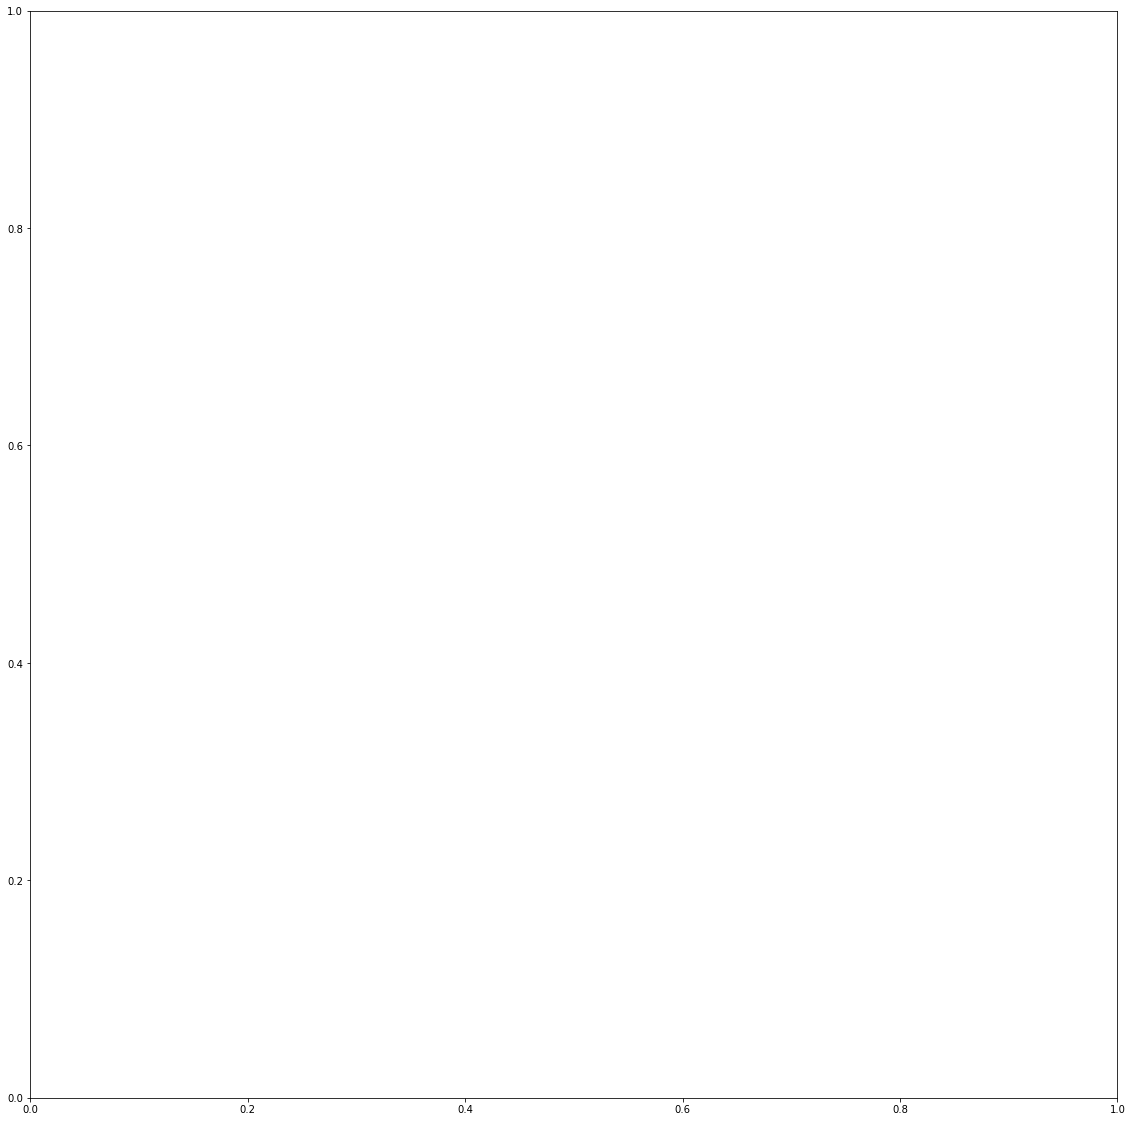

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def corrmatrixheatmap(data, dim = 20, pp = None):
    #set fig size
    fig, ax = plt.subplots(figsize = (dim, dim))
    #use ax.imshow() to create a heatmap of correlation values
    #seismic mapping shows negative values as blue and positive values
    im = ax.imshow(data, norm = plt.cm.colors.Normalize(-1,1), cmap = "seismic mapping")
    #create a list of labels, stacking each word in a label by replacing with "\n"
    labels = data.keys()
    numvars = len(labels)
    ticklables = [label.replacer(" ", "\n") for label in labels]
    #change font size
    tickfontsize = 120 / numvars
    valfontsize = 200 / numvars
    plt.rcParams.update({'font.size': tickfontsize})
    #prepare space for label of each column
    xticks = np.arange(numvars)
    plt.xticks(xticks, ticklabels, fontsize = tickfontsize, roation = 9)
    yticks =np.arange(numvars)
    plt.yticks(yticks, ticklabels, fontsize = tickfontsize)
    #put all of the options chosen above to use and create the correlation
    for i in range (len(labels)):
        for j in range(len(labels)):
            text = ax.text(i,j, str(round(data.values[i][j], 2)),
                          fontsize = valfontsize, ha = "center",
                          va = "center", color ="w")
    #create a title and change font
    titlefont = {"fontname": "Times New Roman"}
    plt.title("Correlation", fontsize = 50, **titlefont)
    #print(i, labels[i], j, labels[j], data.values[i][j])
    cbar = figcolorbar(im)
    plt.show()
    
corrdata = data.corr()
corrmatrixheatmap(corrdata)